# Pytorch workflow
lets do a workflow

In [2]:
what_we_cover = {1 : "data",
                 2 : 'build',
                 3:"fit",
                 4: "eval",
                 5:"save load",
                 6:"putting together"
                }

In [13]:
import torch
from torch import nn
import matplotlib.pyplot as plt


## data and prep

can be almost anything 
- csv
- img
- videos
- audio
- text

1. create numerical representation of data
2. build model to recognise paterns in data

lets start with some know data using lin regres

In [7]:
#known param
weight = .7
bias = .3 

start = 0 
end = 1
step = .02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
y

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [0.5100],
        [0.5240],
        [0.5380],
        [0.5520],
        [0.5660],
        [0.5800],
        [0.5940],
        [0.6080],
        [0.6220],
        [0.6360],
        [0.6500],
        [0.6640],
        [0.6780],
        [0.6920],
        [0.7060],
        [0.7200],
        [0.7340],
        [0.7480],
        [0.7620],
        [0.7760],
        [0.7900],
        [0.8040],
        [0.8180],
        [0.8320],
        [0.8460],
        [0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

### spliting data into training and test data

three datasets
training set = 60-80
validation set = 10-20 (making sure it is learning during learning)
test set = 10-20 (final eval)

the goal is for generalization 

What our model does start with weight and bias
- look at training data 
- try to get close to where we need to be

but how?
1. grad descent 
2. backprop

In [27]:
# create a train/test set
train_split = int(.8 * len (X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_test)

(40, 10)

how might we visualize our data?

In [22]:
def plot_pred(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions=None):
    """
    Plots training and test data 
    Args:
        train_data (_type_, optional): _description_. Defaults to X_train.
        train_labels (_type_, optional): _description_. Defaults to y_train.
        test_data (_type_, optional): _description_. Defaults to X_test.
        test_labels (_type_, optional): _description_. Defaults to y_test.
    """
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="training data")
    
    plt.scatter(test_data, test_labels, c='g', s=4, label="Testing data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label='pred')
        
    plt.legend()
    plt.show()


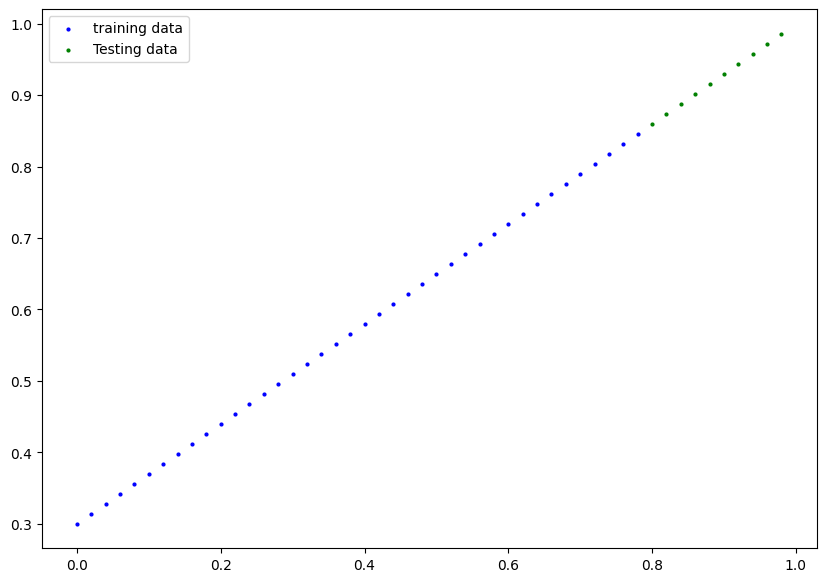

In [23]:
plot_pred(X_train, y_train, X_test, y_test)

## build our first model
let do it


In [35]:
## class inherits from nn.module
# almost everything inherits from nn.module has nice inbuild things
# model should subclass this class all modules contain other modules
class LinearRegressionModel(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        ##this is the model weights we want to require grad because we cant to keep the gradient
        #in fact this is only one tensor with 
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias =  nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
        # any subclass of nn.module requires a foward method
        def foward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data 
            # this is the foward pass
            return self.weights * x +  self.bias # this is the linear regresstion 

### main pytorch classes
- torch.nn contains all building blocks for computational graphs
- torch.params what the nn tries to learn
- torch.nn.Module base class for nn modules
- torch.optim


In [32]:
# create random seed 
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [33]:
model_0.state_dict()
#list parameters in dictionary format

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [34]:
#making prep using torch.inference mode
with torch.inference_mode():
    y_pred = model_0(X_test)
    
y_pred

NotImplementedError: Module [LinearRegressionModel] is missing the required "forward" function